In [1]:
import pandas as pd
import pickle

data = pd.read_csv("preprocessed.csv")
df = pd.DataFrame(data)

df = df.dropna()

In [3]:
X = df['processed_tweet']

y = df['0']

In [4]:
from sklearn.model_selection import train_test_split

X_train ,X_test , y_train , y_test = train_test_split( X , y , random_state=42 , test_size=0.25)

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [7]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

In [8]:
model.fit(X_train_vec, y_train)

MultinomialNB()

In [9]:
predictions = model.predict(X_test_vec)

In [25]:
from sklearn.metrics import accuracy_score , confusion_matrix

print("\n")
print("Accuracy:", accuracy_score(y_test, predictions)*100)
print("\n")

print("Confusion Matrix : \n", confusion_matrix(y_test, predictions))

print("*------*--------*\n")



Accuracy: 76.2083745961248


Confusion Matrix : 
 [[157238  42039]
 [ 53098 147501]]
*------*--------*



### Save Pickle Filecm_df = pd.DataFrame(cm, index=['Actual Positive', 'Actual Negative'], columns=['Predicted Positive', 'Predicted Negative'])

In [11]:
model_name = "model.pkl"

pickle.dump(model , open(model_name , "wb"))

print("Model Saved Successfully !!!\n")

Model Saved Successfully !!!



### Visualize Results

In [16]:
# Confusion Matrix
cm = confusion_matrix(y_test, predictions)

In [17]:
# Create DataFrame of confusion Matrix dataframae for Visualization
cm_df = pd.DataFrame(cm, index=['Actual Positive', 'Actual Negative'], columns=['Predicted Positive', 'Predicted Negative'])

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

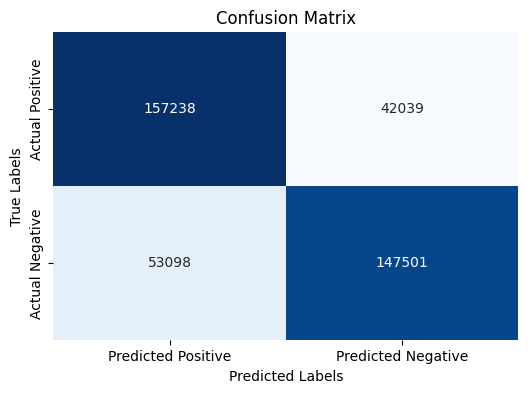

In [24]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()